## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
import warnings
warnings.filterwarnings('ignore')

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
from keras.datasets import cifar10
train, test = cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
from keras import optimizers

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

# 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢
optimizer = optimizers.gradient_descent_v2.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
# 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 18ms/step - loss: 2.2615 - accuracy: 0.1775 - val_loss: 2.2127 - val_accuracy: 0.2142
Epoch 2/500
196/196 [==============================] - 3s 16ms/step - loss: 2.1815 - accuracy: 0.2295 - val_loss: 2.1523 - val_accuracy: 0.2422
Epoch 3/500
196/196 [==============================] - 3s 16ms/step - loss: 2.1280 - accuracy: 0.2535 - val_loss: 2.1050 - val_accuracy: 0.2545
Epoch 4/500
196/196 [==============================] - 3s 17ms/step - loss: 2.0845 - accuracy: 0.2668 - val_loss: 2.0655 - val_accuracy: 0.2713
Epoch 5/500
196/196 [==============================] - 3s 18ms/step - loss: 2.0484 - accuracy: 0.2776 - val_loss: 2.0337 - val_accuracy: 0.2844
Epoch 6/500
196/196 [==============================] - 3s 17ms/step - loss: 2.0182 - accuracy: 0.2889 - val_loss: 2.0067 - val_accuracy: 0.2963
Epoch 7/500
196/196 [==============================] - 3s 17ms/step - loss: 1.9921 - accuracy: 0.2987 - val_loss: 1.9810 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.6705 - accuracy: 0.4188 - val_loss: 1.6741 - val_accuracy: 0.4165
Epoch 58/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6678 - accuracy: 0.4187 - val_loss: 1.6727 - val_accuracy: 0.4167
Epoch 59/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6645 - accuracy: 0.4201 - val_loss: 1.6748 - val_accuracy: 0.4142
Epoch 60/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6618 - accuracy: 0.4209 - val_loss: 1.6688 - val_accuracy: 0.4160
Epoch 61/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6591 - accuracy: 0.4222 - val_loss: 1.6634 - val_accuracy: 0.4178
Epoch 62/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6562 - accuracy: 0.4239 - val_loss: 1.6612 - val_accuracy: 0.4195
Epoch 63/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6529 - accuracy: 0.4243 - val_loss: 1.6590 - val_accuracy: 0.420

196/196 [==============================] - 3s 16ms/step - loss: 1.5394 - accuracy: 0.4642 - val_loss: 1.5638 - val_accuracy: 0.4497
Epoch 114/500
196/196 [==============================] - 3s 17ms/step - loss: 1.5376 - accuracy: 0.4653 - val_loss: 1.5594 - val_accuracy: 0.4518
Epoch 115/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5354 - accuracy: 0.4662 - val_loss: 1.5576 - val_accuracy: 0.4518
Epoch 116/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5336 - accuracy: 0.4668 - val_loss: 1.5557 - val_accuracy: 0.4513
Epoch 117/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5316 - accuracy: 0.4678 - val_loss: 1.5551 - val_accuracy: 0.4484
Epoch 118/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5301 - accuracy: 0.4672 - val_loss: 1.5532 - val_accuracy: 0.4525
Epoch 119/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5282 - accuracy: 0.4684 - val_loss: 1.5616 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.4455 - accuracy: 0.4961 - val_loss: 1.4915 - val_accuracy: 0.4737
Epoch 170/500
196/196 [==============================] - 3s 17ms/step - loss: 1.4438 - accuracy: 0.4985 - val_loss: 1.4900 - val_accuracy: 0.4738
Epoch 171/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4425 - accuracy: 0.4987 - val_loss: 1.4873 - val_accuracy: 0.4746
Epoch 172/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4411 - accuracy: 0.4983 - val_loss: 1.4850 - val_accuracy: 0.4751
Epoch 173/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4391 - accuracy: 0.4994 - val_loss: 1.4910 - val_accuracy: 0.4728
Epoch 174/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4378 - accuracy: 0.5002 - val_loss: 1.4879 - val_accuracy: 0.4751
Epoch 175/500
196/196 [==============================] - 3s 17ms/step - loss: 1.4360 - accuracy: 0.4995 - val_loss: 1.4876 - val_accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 1.3649 - accuracy: 0.5252 - val_loss: 1.4329 - val_accuracy: 0.4920
Epoch 226/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3636 - accuracy: 0.5261 - val_loss: 1.4417 - val_accuracy: 0.4902
Epoch 227/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3630 - accuracy: 0.5260 - val_loss: 1.4372 - val_accuracy: 0.4908
Epoch 228/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3612 - accuracy: 0.5258 - val_loss: 1.4425 - val_accuracy: 0.4877
Epoch 229/500
196/196 [==============================] - 4s 21ms/step - loss: 1.3597 - accuracy: 0.5275 - val_loss: 1.4374 - val_accuracy: 0.4893
Epoch 230/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3591 - accuracy: 0.5268 - val_loss: 1.4410 - val_accuracy: 0.4930
Epoch 231/500
196/196 [==============================] - 3s 17ms/step - loss: 1.3572 - accuracy: 0.5280 - val_loss: 1.4326 - val_accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 1.2959 - accuracy: 0.5477 - val_loss: 1.3939 - val_accuracy: 0.5053
Epoch 282/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2944 - accuracy: 0.5486 - val_loss: 1.4051 - val_accuracy: 0.5008
Epoch 283/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2928 - accuracy: 0.5477 - val_loss: 1.3983 - val_accuracy: 0.5064
Epoch 284/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2913 - accuracy: 0.5487 - val_loss: 1.3990 - val_accuracy: 0.5022
Epoch 285/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2901 - accuracy: 0.5496 - val_loss: 1.3975 - val_accuracy: 0.5091
Epoch 286/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2888 - accuracy: 0.5510 - val_loss: 1.3930 - val_accuracy: 0.5013
Epoch 287/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2878 - accuracy: 0.5514 - val_loss: 1.3956 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.2317 - accuracy: 0.5694 - val_loss: 1.3995 - val_accuracy: 0.4990
Epoch 338/500
196/196 [==============================] - 3s 17ms/step - loss: 1.2311 - accuracy: 0.5706 - val_loss: 1.3903 - val_accuracy: 0.5051
Epoch 339/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2299 - accuracy: 0.5690 - val_loss: 1.3774 - val_accuracy: 0.5092
Epoch 340/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2271 - accuracy: 0.5709 - val_loss: 1.3711 - val_accuracy: 0.5134
Epoch 341/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2266 - accuracy: 0.5714 - val_loss: 1.3662 - val_accuracy: 0.5129
Epoch 342/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2254 - accuracy: 0.5708 - val_loss: 1.3772 - val_accuracy: 0.5127
Epoch 343/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2256 - accuracy: 0.5708 - val_loss: 1.3678 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.1720 - accuracy: 0.5886 - val_loss: 1.3477 - val_accuracy: 0.5226
Epoch 394/500
196/196 [==============================] - 4s 20ms/step - loss: 1.1709 - accuracy: 0.5907 - val_loss: 1.3622 - val_accuracy: 0.5178
Epoch 395/500
196/196 [==============================] - 4s 20ms/step - loss: 1.1687 - accuracy: 0.5916 - val_loss: 1.3779 - val_accuracy: 0.5117
Epoch 396/500
196/196 [==============================] - 4s 20ms/step - loss: 1.1684 - accuracy: 0.5924 - val_loss: 1.3637 - val_accuracy: 0.5179
Epoch 397/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1671 - accuracy: 0.5933 - val_loss: 1.3636 - val_accuracy: 0.5140
Epoch 398/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1671 - accuracy: 0.5910 - val_loss: 1.3497 - val_accuracy: 0.5180
Epoch 399/500
196/196 [==============================] - 5s 24ms/step - loss: 1.1647 - accuracy: 0.5924 - val_loss: 1.3457 - val_accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 1.1167 - accuracy: 0.6105 - val_loss: 1.3404 - val_accuracy: 0.5283
Epoch 450/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1141 - accuracy: 0.6106 - val_loss: 1.3525 - val_accuracy: 0.5180
Epoch 451/500
196/196 [==============================] - 5s 25ms/step - loss: 1.1125 - accuracy: 0.6123 - val_loss: 1.3456 - val_accuracy: 0.5246
Epoch 452/500
196/196 [==============================] - 5s 24ms/step - loss: 1.1103 - accuracy: 0.6112 - val_loss: 1.3439 - val_accuracy: 0.5258
Epoch 453/500
196/196 [==============================] - 4s 23ms/step - loss: 1.1104 - accuracy: 0.6128 - val_loss: 1.3374 - val_accuracy: 0.5232
Epoch 454/500
196/196 [==============================] - 5s 23ms/step - loss: 1.1097 - accuracy: 0.6137 - val_loss: 1.3325 - val_accuracy: 0.5286
Epoch 455/500
196/196 [==============================] - 4s 23ms/step - loss: 1.1096 - accuracy: 0.6131 - val_loss: 1.3318 - val_accuracy:

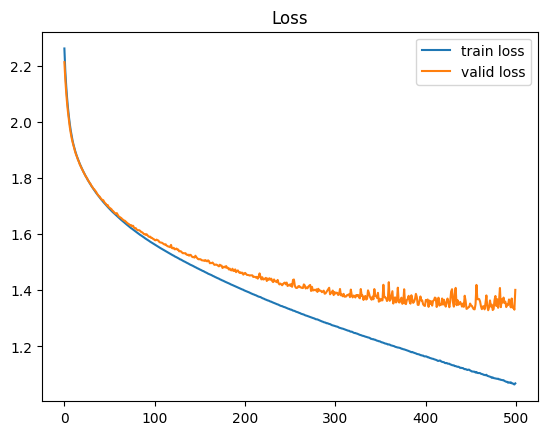

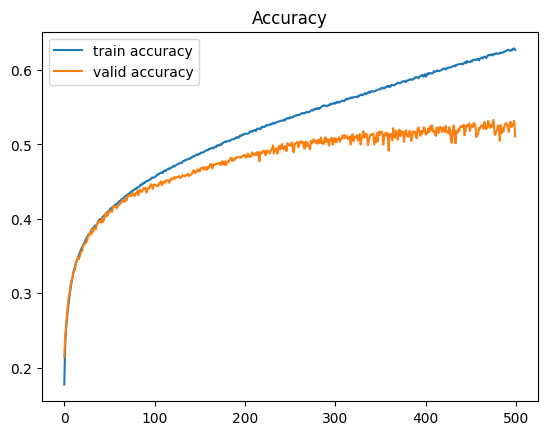

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()